In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [63]:
print(sorted(np.random.randint(1, 7, size=3), reverse=True))

[5, 4, 2]


In [64]:
def simulate_battle_round(attacker_dice=3, defender_dice=2):
  
    attacker_rolls = sorted(np.random.randint(1, 7, size=attacker_dice), reverse=True)
    defender_rolls = sorted(np.random.randint(1, 7, size=defender_dice), reverse=True)
    
    attacker_losses = 0
    defender_losses = 0
    explanation = []

    for a_roll, d_roll in zip(attacker_rolls, defender_rolls):
        if a_roll > d_roll:
            defender_losses += 1
            explanation.append(f"Attacker's {a_roll} beats Defender's {d_roll}")
        else:
            attacker_losses += 1
            explanation.append(f"Defender's {d_roll} beats Attacker's {a_roll}")
    
    return attacker_rolls, defender_rolls, attacker_losses, defender_losses, explanation


In [65]:
# Call the function
attacker_rolls, defender_rolls, attacker_losses, defender_losses, explanation = simulate_battle_round()

# Print the results
print("Attacker Rolls:", attacker_rolls)
print("Defender Rolls:", defender_rolls)
print("Attacker Losses:", attacker_losses)
print("Defender Losses:", defender_losses)
print("Explanation of each roll:")
for detail in explanation:
    print(detail)

Attacker Rolls: [6, 5, 2]
Defender Rolls: [6, 5]
Attacker Losses: 2
Defender Losses: 0
Explanation of each roll:
Defender's 6 beats Attacker's 6
Defender's 5 beats Attacker's 5


In [66]:
def simulate_and_store_battle_rounds(n_rounds=1000):
    records = []
    for _ in range(n_rounds):
        a_rolls, d_rolls, a_loss, d_loss, explanation = simulate_battle_round()
        records.append({
            "Attacker Rolls": a_rolls,
            "Defender Rolls": d_rolls,
            "Attacker Loses": a_loss,
            "Defender Loses": d_loss,
            "Explanation": "; ".join(explanation)
        })
    return records


In [67]:
def display_battle_table(records):
    df = pd.DataFrame(records)
    print(df.head(10))  # Display the first 10 rows
    return df

In [68]:
def plot_results(df):
    plt.figure(figsize=(12, 6))
    plt.hist(df["Attacker Loses"], bins=range(4), alpha=0.7, label="Attacker Losses", align="left")
    plt.hist(df["Defender Loses"], bins=range(3), alpha=0.7, label="Defender Losses", align="left")
    plt.title("Risk Battle Round Results")
    plt.xlabel("Losses per Round")
    plt.ylabel("Frequency")
    plt.xticks(range(4))
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [69]:
def analyze_battle_statistics(df):
    # Basic Metrics
    avg_attacker_losses = df["Attacker Loses"].mean()
    avg_defender_losses = df["Defender Loses"].mean()
    attacker_win_rate = (df["Defender Loses"] > df["Attacker Loses"]).mean() * 100
    defender_win_rate = (df["Attacker Loses"] > df["Defender Loses"]).mean() * 100

    print(f"Average Attacker Losses: {avg_attacker_losses:.2f}")
    print(f"Average Defender Losses: {avg_defender_losses:.2f}")
    print(f"Attacker Win Rate: {attacker_win_rate:.2f}%")
    print(f"Defender Win Rate: {defender_win_rate:.2f}%")
    
    # Distribution of Rolls
    all_attacker_rolls = sum(df["Attacker Rolls"], [])
    all_defender_rolls = sum(df["Defender Rolls"], [])
    
    plt.figure(figsize=(12, 6))
    plt.hist(all_attacker_rolls, bins=range(1, 8), alpha=0.7, label="Attacker Rolls", align="left")
    plt.hist(all_defender_rolls, bins=range(1, 8), alpha=0.7, label="Defender Rolls", align="left")
    plt.title("Distribution of Dice Rolls")
    plt.xlabel("Dice Value")
    plt.ylabel("Frequency")
    plt.xticks(range(1, 7))
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
    # Loss Outcome Breakdown
    outcome_counts = df.groupby(["Attacker Loses", "Defender Loses"]).size().unstack(fill_value=0)
    plt.figure(figsize=(8, 6))
    outcome_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
    plt.title("Outcome Breakdown (Attacker vs. Defender Losses)")
    plt.xlabel("Attacker Losses")
    plt.ylabel("Frequency")
    plt.legend(title="Defender Losses")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

  Attacker Rolls Defender Rolls  Attacker Loses  Defender Loses  \
0      [6, 4, 2]         [6, 4]               2               0   
1      [5, 4, 2]         [5, 1]               1               1   
2      [6, 3, 1]         [6, 1]               1               1   
3      [6, 5, 1]         [6, 1]               1               1   
4      [6, 5, 1]         [5, 3]               0               2   
5      [6, 4, 1]         [5, 3]               0               2   
6      [4, 4, 3]         [5, 3]               1               1   
7      [6, 2, 1]         [6, 1]               1               1   
8      [6, 4, 3]         [2, 2]               0               2   
9      [6, 6, 2]         [5, 2]               0               2   

                                         Explanation  
0  Defender's 6 beats Attacker's 6; Defender's 4 ...  
1  Defender's 5 beats Attacker's 5; Attacker's 4 ...  
2  Defender's 6 beats Attacker's 6; Attacker's 3 ...  
3  Defender's 6 beats Attacker's 6; Attack

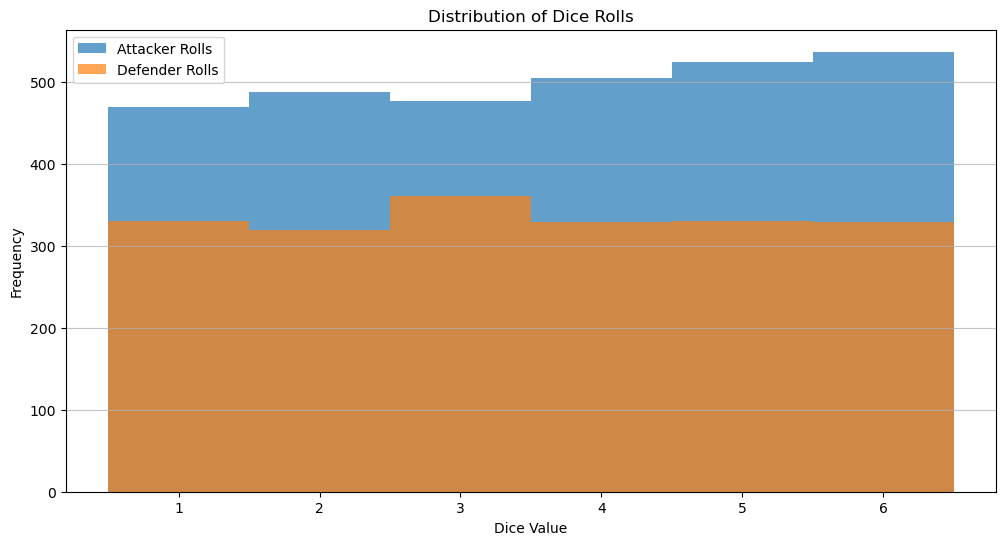

<Figure size 800x600 with 0 Axes>

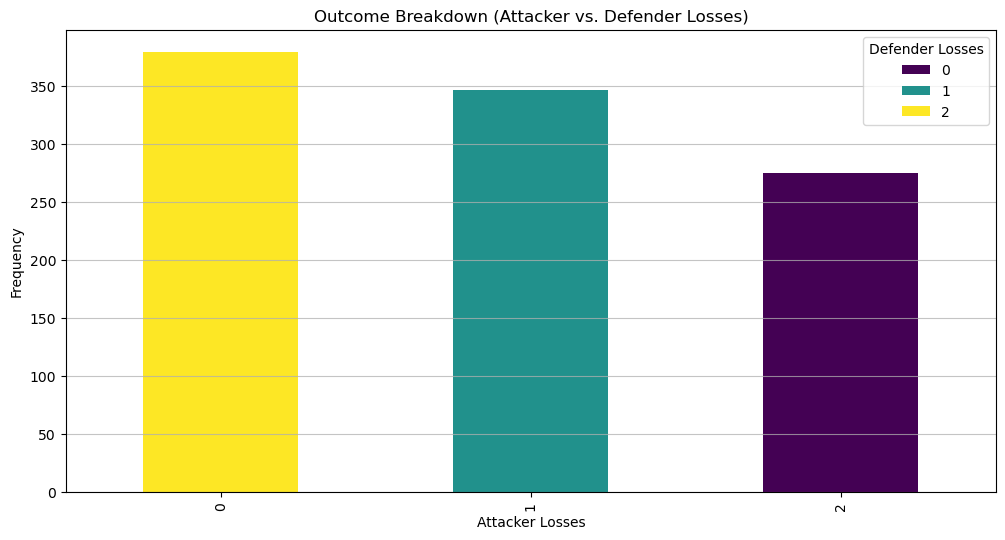

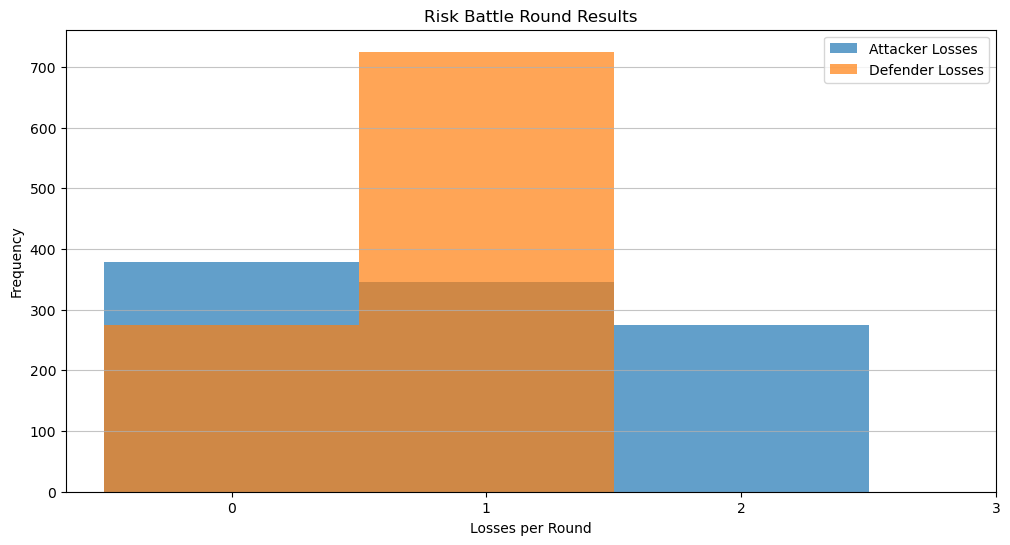

In [70]:
if __name__ == "__main__":
    battle_records = simulate_and_store_battle_rounds(1000)
    battle_df = display_battle_table(battle_records)

    analyze_battle_statistics(battle_df)

    plot_results(battle_df)